In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/User/Downloads/Diamond Price Prediction.csv')
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


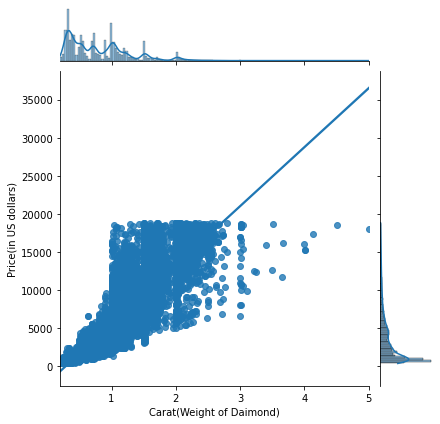

In [17]:
sns.jointplot(x='Carat(Weight of Daimond)', y='Price(in US dollars)', 
              data=df, kind='reg')

чем больше карат, тем больше цена, в среднем алмазы до 3 карат

In [24]:
rating = df.groupby('Cut(Quality)')[['Price(in US dollars)']].sum()\
    .sort_values('Price(in US dollars)', ascending=False).head()
rating.style.bar()

,Price(in US dollars)
Cut(Quality),
Ideal,74513487
Premium,63221498
Very Good,48107623
Good,19275009
Fair,7017600


наибольшая стоимость алмазовов типа Ideal

<AxesSubplot:ylabel='Color'>

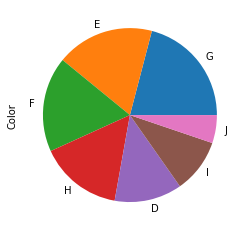

In [26]:
type_cosmetics = df['Color'].value_counts()
type_cosmetics.plot(kind='pie', y='Count')

представлено наибольшее количество алмазов цвета G, наименьшее - J

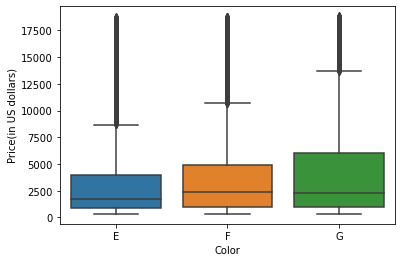

In [34]:
сolor = df.Color.value_counts().sort_values(ascending=False).head(3).index.values
сolor
ax = sns.boxplot(x="Color", y="Price(in US dollars)", data=df[df.Color.isin(сolor)])

наибольшую цену имеет цвет алмазов G

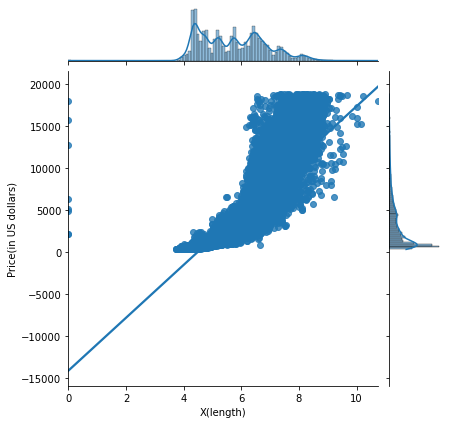

In [66]:
sns.jointplot(x='X(length)', y='Price(in US dollars)', 
              data=df, kind='reg')

In [ ]:
алмазы имеют более высокую цену, если длина больше 4

In [40]:
almaz = df.pivot_table(
                        index='Carat(Weight of Daimond)', 
                        columns='Cut(Quality)', 
                        values='Price(in US dollars)', 
                        aggfunc=sum).fillna(0).applymap(float)

almaz

Cut(Quality),Fair,Good,Ideal,Premium,Very Good
Carat(Weight of Daimond),,,,,
0.20,0.0,0.0,1101.0,2914.0,367.0
0.21,0.0,0.0,0.0,3036.0,386.0
0.22,337.0,0.0,0.0,1620.0,0.0
0.23,369.0,13731.0,21920.0,11330.0,95090.0
0.24,0.0,6414.0,38297.0,9518.0,74088.0
...,...,...,...,...,...
4.00,0.0,0.0,0.0,0.0,15984.0
4.01,0.0,0.0,0.0,30446.0,0.0
4.13,17329.0,0.0,0.0,0.0,0.0


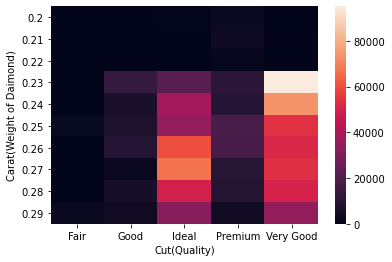

In [49]:
ax = sns.heatmap(almaz.head(10))

цены алмазов, у которых карат больше 0.22, выше, чем у остальных

In [63]:
arr= df.groupby('Cut(Quality)')[['Z(Depth)','Y(width)','X(length)', 'Price(in US dollars)']].sum()\
     .sort_values('Price(in US dollars)', ascending=False)
arr.head()

,Z(Depth),Y(width),X(length),Price(in US dollars)
Cut(Quality),,,,
Ideal,73304.61,118963.24,118691.07,74513487
Premium,50297.49,81985.82,82385.88,63221498
Very Good,43009.52,69713.45,69359.09,48107623
Good,17855.42,28703.75,28645.08,19275009
Fair,6412.26,9954.07,10057.50,7017600


array([[<AxesSubplot:xlabel='Z(Depth)', ylabel='Z(Depth)'>,
        <AxesSubplot:xlabel='Y(width)', ylabel='Z(Depth)'>,
        <AxesSubplot:xlabel='X(length)', ylabel='Z(Depth)'>,
        <AxesSubplot:xlabel='Price(in US dollars)', ylabel='Z(Depth)'>],
       [<AxesSubplot:xlabel='Z(Depth)', ylabel='Y(width)'>,
        <AxesSubplot:xlabel='Y(width)', ylabel='Y(width)'>,
        <AxesSubplot:xlabel='X(length)', ylabel='Y(width)'>,
        <AxesSubplot:xlabel='Price(in US dollars)', ylabel='Y(width)'>],
       [<AxesSubplot:xlabel='Z(Depth)', ylabel='X(length)'>,
        <AxesSubplot:xlabel='Y(width)', ylabel='X(length)'>,
        <AxesSubplot:xlabel='X(length)', ylabel='X(length)'>,
        <AxesSubplot:xlabel='Price(in US dollars)', ylabel='X(length)'>],
       [<AxesSubplot:xlabel='Z(Depth)', ylabel='Price(in US dollars)'>,
        <AxesSubplot:xlabel='Y(width)', ylabel='Price(in US dollars)'>,
        <AxesSubplot:xlabel='X(length)', ylabel='Price(in US dollars)'>,
        <AxesSubp

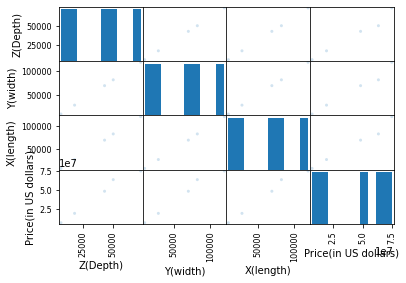

In [64]:
pd.plotting.scatter_matrix(arr, alpha=0.2)

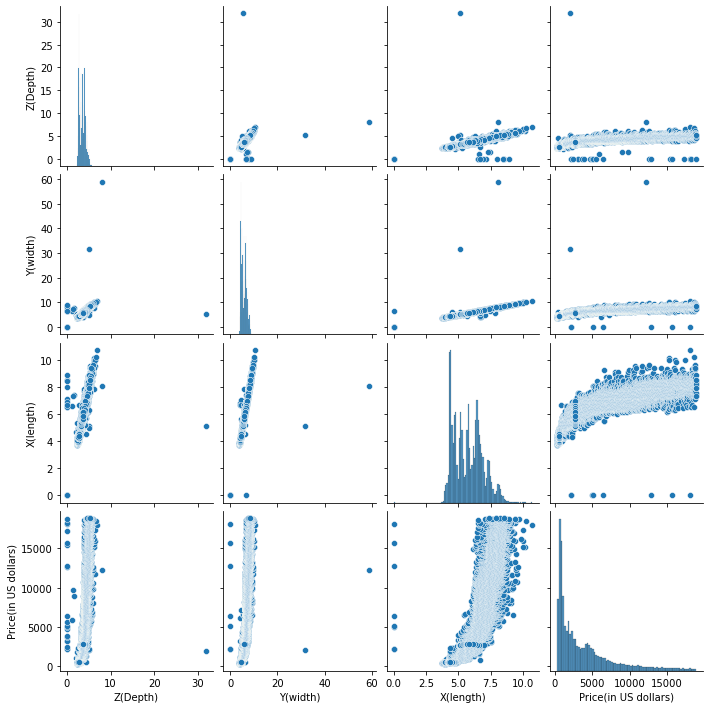

In [65]:
sns_plot = sns.pairplot(
    df[['Z(Depth)','Y(width)', 'X(length)','Price(in US dollars)']])
sns_plot

In [ ]:
алмазы с большей длиной стоят дороже, так же стоят дороже алмазы с шириной и высотой маленькой